In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf 
import numpy as np
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Food_Images/food-101/images',
                                                    image_size = (224,224),
                                                    validation_split = 0.7, subset = 'training', seed = 143, batch_size = 20)

IMG_size = 224
IMG_shape = (IMG_size, IMG_size, 3)
base_model  = tf.keras.applications.VGG19(input_shape=IMG_shape,
                                                include_top = False, 
                                                weights = 'imagenet')

base_model.trainable = False
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction = tf.keras.layers.Dense(101)
model = tf.keras.models.Sequential([base_model, global_avg_layer, prediction])
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(lr = base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

# Creating checkpoints
import os
# Directory where the checkpoints will be saved
checkpoint_dir = '/content/drive/MyDrive/Food_Images/vgg19_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
#model.build(tf.TensorShape([1, None]))

history = model.fit(train_ds, epochs = 100, callbacks=[checkpoint_callback])

Found 101000 files belonging to 101 classes.
Using 30300 files for training.
Epoch 1/100
1515/1515 [==============================] - 11096s 7s/step - loss: 19.0326 - accuracy: 0.1799
Epoch 2/100
1515/1515 [==============================] - 266s 175ms/step - loss: 17.6563 - accuracy: 0.3364
Epoch 3/100
1515/1515 [==============================] - 265s 175ms/step - loss: 17.6988 - accuracy: 0.3715
Epoch 4/100
1515/1515 [==============================] - 264s 174ms/step - loss: 17.6751 - accuracy: 0.4009
Epoch 5/100
1515/1515 [==============================] - 265s 175ms/step - loss: 17.6013 - accuracy: 0.4185
Epoch 6/100
1515/1515 [==============================] - 265s 175ms/step - loss: 17.4642 - accuracy: 0.4345
Epoch 7/100
1515/1515 [==============================] - 265s 174ms/step - loss: 17.5258 - accuracy: 0.4424
Epoch 8/100
1515/1515 [==============================] - 265s 175ms/step - loss: 17.3502 - accuracy: 0.4560
Epoch 9/100
1515/1515 [==============================] - 266

In [ ]:
IMG_size = 224
IMG_shape = (IMG_size, IMG_size, 3)
base_model  = tf.keras.applications.VGG19(input_shape=IMG_shape,
                                                include_top = False, 
                                                weights = 'imagenet')

base_model.trainable = False
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction = tf.keras.layers.Dense(101)
model = tf.keras.models.Sequential([base_model, global_avg_layer, prediction])
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(lr = base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
checkpoint_dir = '/content/drive/MyDrive/Food_Images/vgg19_checkpoints'

# Reload the model
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

# Train again
history = model.fit(train_ds, epochs = 100, callbacks=[checkpoint_callback])

Found 101000 files belonging to 101 classes.
Using 30300 files for training.
Epoch 1/100
2020/2020 [==============================] - 10667s 5s/step - loss: 68.9509 - accuracy: 0.4126
Epoch 2/100
2020/2020 [==============================] - 226s 112ms/step - loss: 53.1247 - accuracy: 0.4646
Epoch 3/100
2020/2020 [==============================] - 225s 111ms/step - loss: 46.4708 - accuracy: 0.4849
Epoch 4/100
2020/2020 [==============================] - 225s 111ms/step - loss: 41.6679 - accuracy: 0.4987
Epoch 5/100
2020/2020 [==============================] - 226s 111ms/step - loss: 38.1203 - accuracy: 0.5096
Epoch 6/100
2020/2020 [==============================] - 226s 112ms/step - loss: 35.5828 - accuracy: 0.5175
Epoch 7/100
2020/2020 [==============================] - 227s 112ms/step - loss: 32.8696 - accuracy: 0.5234
Epoch 8/100
2020/2020 [==============================] - 227s 112ms/step - loss: 31.4894 - accuracy: 0.5285
Epoch 9/100
2020/2020 [==============================] - 227

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Food_Images/food-101/images',
                                                    image_size = (224,224),
                                                    validation_split = 0.01, subset = 'validation', seed = 123, batch_size = 20)

In [ ]:
labels = open('/content/drive/MyDrive/Food_Images/food-101/labels.txt')
classes = labels.read()
classes = classes.split(sep = '\n')
classes = classes[:-1]
labels.close()

In [6]:
labels = open('/content/drive/MyDrive/Food_Images/food-101/classes.txt')
folders = labels.read()
folders = folders.split(sep = '\n')
labels.close()
folders = folders[:-1]

In [ ]:
def make_prediction(path, model = model):
  image = tf.keras.preprocessing.image.load_img(path, target_size=(224,224, 3))
  image = tf.keras.preprocessing.image.img_to_array(image)
  img_array = tf.expand_dims(image, 0)

  prediction = model.predict(img_array)

  pred_class = np.argmax(prediction)

  return folders[pred_class]

In [ ]:
make_prediction('/content/a3708fed-2ebc-4d10-bc8a-0c04dcd9a9db.jpeg') 

'cheese_plate'

In [ ]:
import os
import random
def top_losses():
  '''
  This function randomly picks 10 pictures from each class, and finds the accuracy for each class
  '''
  results = {}
  for folder in folders: # for each class 
    result = []
    path = '/content/drive/MyDrive/Food_Images/food-101/images/' + folder
    
    for i in range(10): # iterate 10 times
      image_name = random.sample(os.listdir(path), 1)[0] # randomly pick a file name
      predicted_class = make_prediction(path + '/' + image_name)
      t = (predicted_class, folder)
      result.append(t[0] == t[1]) # check if the predicted class is the same as the actual class
    
    results[folder] = sum(result) / len(result) # find the proportion of correct predictions
  return results

In [ ]:
result = top_losses()
result

{'apple_pie': 0.0,
 'baby_back_ribs': 0.4,
 'baklava': 0.2,
 'beef_carpaccio': 0.7,
 'beef_tartare': 0.0,
 'beet_salad': 0.4,
 'beignets': 0.5,
 'bibimbap': 0.3,
 'bread_pudding': 0.3,
 'breakfast_burrito': 0.1,
 'bruschetta': 0.0,
 'caesar_salad': 0.3,
 'cannoli': 0.5,
 'caprese_salad': 0.6,
 'carrot_cake': 0.2,
 'ceviche': 0.4,
 'cheese_plate': 0.0,
 'cheesecake': 0.0,
 'chicken_curry': 0.4,
 'chicken_quesadilla': 0.3,
 'chicken_wings': 0.1,
 'chocolate_cake': 0.6,
 'chocolate_mousse': 0.3,
 'churros': 0.6,
 'clam_chowder': 0.5,
 'club_sandwich': 0.4,
 'crab_cakes': 0.6,
 'creme_brulee': 0.5,
 'croque_madame': 0.4,
 'cup_cakes': 0.3,
 'deviled_eggs': 0.6,
 'donuts': 0.8,
 'dumplings': 0.5,
 'edamame': 1.0,
 'eggs_benedict': 0.3,
 'escargots': 0.5,
 'falafel': 0.4,
 'filet_mignon': 0.4,
 'fish_and_chips': 0.3,
 'foie_gras': 0.2,
 'french_fries': 0.7,
 'french_onion_soup': 0.7,
 'french_toast': 0.0,
 'fried_calamari': 0.1,
 'fried_rice': 0.8,
 'frozen_yogurt': 0.9,
 'garlic_bread': 0.6

In [ ]:
# find food classes that have a poor classification accuracy
index = [i for i,x in enumerate(result.values()) if x <= 0.1]
worst = [folders[i] for i in index]
worst

['bruschetta',
 'cheesecake',
 'cheese_plate',
 'chocolate_cake',
 'chocolate_mousse',
 'falafel',
 'filet_mignon',
 'greek_salad',
 'grilled_salmon',
 'pork_chop',
 'ravioli',
 'tiramisu',
 'tuna_tartare']

In [ ]:
# find the best classified foods
index = [i for i,x in enumerate(result.values()) if x >= 0.9]
best = [folders[i] for i in index]
best

['dumplings', 'edamame', 'frozen_yogurt', 'onion_rings']

In [ ]:
# Average accuracy for all our samples 
sum(result.values()) / len(result.values())

0.43465346534653476

In [ ]:
np.median(result.values())

0.5

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


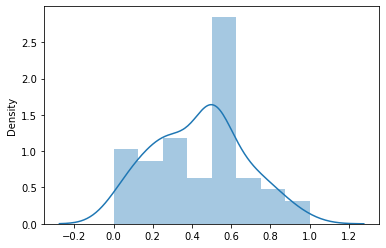

In [ ]:
# plot the distrbution of class accuracy
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(list(result.values()))

In [ ]:
model.save('/content/drive/MyDrive/Food_Images/vgg19_v2.h', )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Food_Images/vgg19_v2.h/assets
